In [71]:
library(readr)

ess18 <- read_csv("https://github.com/RolfLund/4semesterR/raw/master/teaching-materials/r-intro/datasets/ESS2018DK_subset.csv")

Rows: 1285 Columns: 17

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (7): vote, prtvtddk, health, lvpntyr, tygrtr, gndr, edlvddk
dbl (10): idno, netustm, ppltrst, yrbrn, eduyrs, wkhct, wkhtot, grspnum, frl...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



# Introduktion til R (del 2)

*4. semester sociologi, 2022*

## Program

- Hvorfor er datahåndtering så vigtigt?
- Datahåndtering og visualisering i R: Et eksempel
- Subsetting (`filter` og `select`)
- Nye variable og rekodning (`mutate`)
- Kategoriske variable ("factors" i R)
- Visualisering i R med `ggplot`

#### Hvis vi når det
- Lav dine egne funktioner i R
- Opsummeringer af data med `group_by()` 

## HUSK!

Al materiale fra i dag kan findes på kursussiden: https://rolflund.github.io/4semesterR/ (sektionerne "Intro til R I" og "Intro til R II")

Bogen "R for Data Science" introducerer til datahåndtering og visualiseirng, og kan tilgås gratis online: https://r4ds.had.co.nz/

<center><a href = "https://r4ds.had.co.nz/"> <img src="https://d33wubrfki0l68.cloudfront.net/b88ef926a004b0fce72b2526b0b5c4413666a4cb/24a30/cover.png" width="200"/></a></center>

Brug Google (eller anden søgemaskine)!

## Datahåndtering og visualisering i R: Et eksempel

Herunder foretages en række datahåndteringer på European Social Survey 2018 delsættet. Vi bruger dagen i dag på at forstå de forskellige datahåndteringsfunktioner (primært fra `tidyverse` - specifikt pakken `dplyr`).

In [4]:
library(dplyr)

ess18_wh <- ess18 %>%
    mutate(age = 2018 - yrbrn) %>%
    filter(age >= 25) %>%
    filter(!(is.na(wkhtot))) %>%
    mutate(wkhtot_cat = case_when(
        wkhtot == 37 ~ "37 timer om ugen",
        wkhtot < 37 ~ "Mindre end 37 timer",
        wkhtot > 37 ~ "Mere end 37 timer")
          ) %>%
    mutate(wkhtot_cat = factor(wkhtot_cat, levels = c("Mindre end 37 timer", "37 timer om ugen", "Mere end 37 timer"), 
                               ordered = TRUE)) %>%
    mutate(gndr = factor(gndr, levels = c("Male", "Female"), labels = c("Mand", "Kvinde"))) %>%
    select(gndr, age, wkhtot, wkhtot_cat, netustm)

Herunder dannes et barplot baseret på det sæt, som blev dannet i ovenstående kode. Vi vil ligeledes bruge dagen i dag på at forstå, hvordan denne visualisering er dannet (med brug af `ggplot2` - også en del af `tidyverse`)

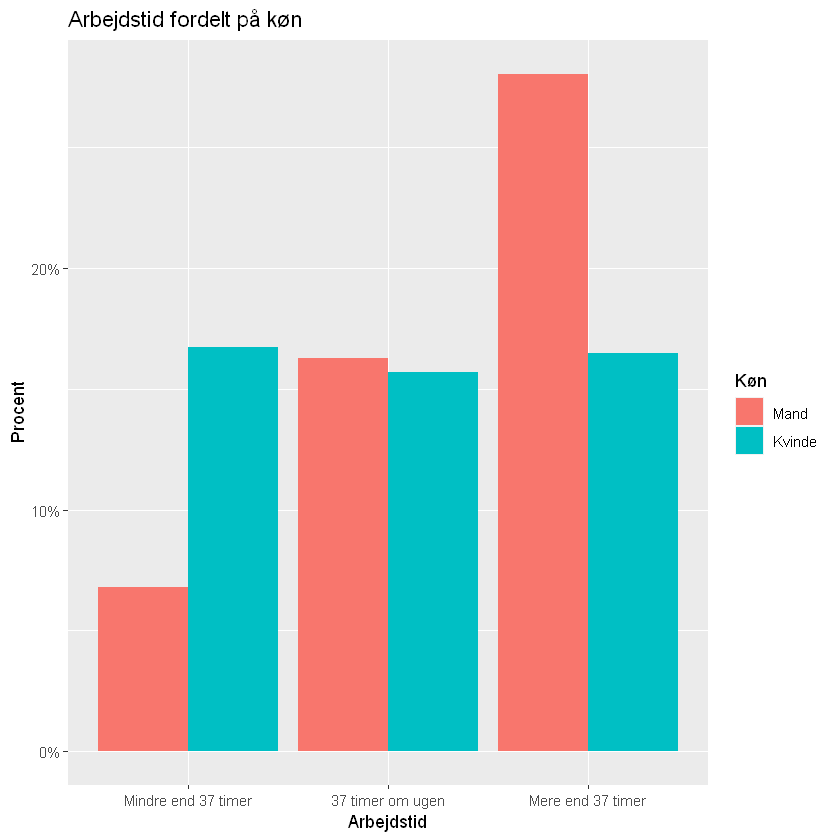

In [26]:
library(ggplot2)

ggplot(ess18_wh, aes(x = wkhtot_cat, y = (..count..)/sum(..count..), fill = gndr)) + 
    geom_bar(position = "dodge") + 
    scale_y_continuous(labels = scales::percent) + 
    labs(title = "Arbejdstid fordelt på køn",
         x = "Arbejdstid",
         y = "Procent", 
         fill = "Køn")

## Subsetting (`filter` og `select`)

Se under "Intro til R I" under sektionen "Datahåndtering i R".

## Nye variable og rekodning (`mutate`)

Se under "Intro til R I" under sektionen "Datahåndtering i R".

## Kombinér datahåndteringsfunktioner med pipe (%>%)

Det bliver hurtigt omstændeligt at foretage flere datahåndteringsoperationer, hvis man skal specificere navnet på datasættet hver gang. Dette kan forsimples ved brug af "pipe"-operatoren (`%>%`).

"pipe"-operatoren er en del af `tidyverse` og er derfor kompatibel med næsten alle funktioner fra de `tidyverse` pakkerne. 

Et "pipe" fungerer kort sagt ved at tage outputtet på en kodelinje videre til kodelinjen under, og bruge dette output som input i funktionen på den nye linje. Man bruger for det meste "pipe" i forbindelse med datahåndtering, da ideen her er, at outputtet af en kodelinje/kommando er en dataframe, som så kan bruges som input på kodelinjen/kommandoen på næste linje.

Herunder dannes et subet af ESS18, der indeholder alle mænd og variablene `idno`, `gndr`, `yrbrn`, `edlvddk`:

In [5]:
ess18_male_subset <- filter(ess18, gndr == 'Male')
ess18_male_subset <- select(ess18, idno, gndr, yrbrn, edlvddk)

head(ess18_male_subset)

idno,gndr,yrbrn,edlvddk
<dbl>,<chr>,<dbl>,<chr>
5816,Male,1974,"Mellemlang videregående uddannelse af 3-4 års varighed. Professionsbachelorer,"
7251,Female,1975,"Faglig uddannelse (håndværk, handel, landbrug mv.), F.eks. Faglærte, Social-"
7887,Male,1958,"Lang videregående uddannelse. Kandidatuddannelser af 5.-6. års varighed, F.eks"
9607,Female,1964,"Mellemlang videregående uddannelse af 3-4 års varighed. Professionsbachelorer,"
11688,Female,1952,"Faglig uddannelse (håndværk, handel, landbrug mv.), F.eks. Faglærte, Social-"
12355,Male,1963,"Faglig uddannelse (håndværk, handel, landbrug mv.), F.eks. Faglærte, Social-"


Ovenstående kode er omstændelig af flere grunde: For det første skal navnet på det endelige subset `ess18_male_subset` gentages for hver datahåndteringskommando. For det andet skal inputdatasættet (`ess18`) også gentages hver gang.

Med et pipe kan dette undgås:

In [6]:
ess18_male_subset <- ess18 %>% # subset skal tage udgangspunkt i ess18
    filter(gndr == 'Male') %>% # filter for mænd - datainput er output af ovenstående (en kopi af ess18)
    select(idno, gndr, yrbrn, edlvddk) # udvælg variable - datainput er output af ovenstående (ess18 filtreret for mænd)

head(ess18_male_subset)

idno,gndr,yrbrn,edlvddk
<dbl>,<chr>,<dbl>,<chr>
5816,Male,1974,"Mellemlang videregående uddannelse af 3-4 års varighed. Professionsbachelorer,"
7887,Male,1958,"Lang videregående uddannelse. Kandidatuddannelser af 5.-6. års varighed, F.eks"
12355,Male,1963,"Faglig uddannelse (håndværk, handel, landbrug mv.), F.eks. Faglærte, Social-"
16357,Male,1991,"Mellemlang videregående uddannelse af 3-4 års varighed. Professionsbachelorer,"
20724,Male,1958,"Faglig uddannelse (håndværk, handel, landbrug mv.), F.eks. Faglærte, Social-"
24928,Male,1965,"Mellemlang videregående uddannelse af 3-4 års varighed. Professionsbachelorer,"


## Factors (kategoriske variable)

Kategoriske variable (nominale og ordinale variable) er typisk gemt som typen "factor" i R.

Factors bruges til eksplicit at fortælle R, at variablen skal behandles som nominal eller ordinal. Ved at konvertere en variabel til en factor, sætter man både begrænsninger for de mulige værdier (denne variabel indeholder kun X værdier), og man fortæller R, hvordan den skal håndtere variablen, når den bruges i en statistisk model. 

Factors kan enten være "unordered" eller "ordered". En "unordered" factor svarer til en nominalskaleret variabel (en variabel *uden* rangorden), mens en "ordered" factor svarer til en ordinalskaleret variabel (en variabel *med* rangorden).

R kan nogen gange finde på at indlæse tekstvariable som factorer. Dette kan give problemer, da man i sådanne tilfælde ikke har kontrol med, hvordan den er blevet konverteret til en factor (fx at en ordinalskaleret bliver lavet til en "unordered" factor).

### Dan en factor

En variabel kan omdannes til en factor med funktionen (`as.factor`):

In [24]:
ess18n <- ess18 %>%
    mutate(gndr = as.factor(gndr))

head(ess18n)

idno,netustm,ppltrst,vote,prtvtddk,health,lvpntyr,tygrtr,gndr,yrbrn,edlvddk,eduyrs,wkhct,wkhtot,grspnum,frlgrsp,inwtm
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5816,90,7,Yes,SF Socialistisk Folkeparti - Socialist People's Party,Good,1994,60,Male,1974,"Mellemlang videregående uddannelse af 3-4 års varighed. Professionsbachelorer,",35,37,37,37000,35000,61
7251,300,5,Yes,Dansk Folkeparti - Danish People's Party,Fair,1993,40,Female,1975,"Faglig uddannelse (håndværk, handel, landbrug mv.), F.eks. Faglærte, Social-",13,32,34,22000,30000,68
7887,360,8,Yes,Socialdemokratiet - The Social democrats,Fair,1983,55,Male,1958,"Lang videregående uddannelse. Kandidatuddannelser af 5.-6. års varighed, F.eks",25,39,39,36000,42000,89
9607,540,9,Yes,Alternativet - The Alternative,Good,1982,64,Female,1964,"Mellemlang videregående uddannelse af 3-4 års varighed. Professionsbachelorer,",13,32,34,32000,NA,50
11688,NA,5,Yes,Socialdemokratiet - The Social democrats,Very bad,1968,50,Female,1952,"Faglig uddannelse (håndværk, handel, landbrug mv.), F.eks. Faglærte, Social-",2,37,37,NA,NA,77
12355,120,5,Yes,Socialdemokratiet - The Social democrats,Fair,1987,60,Male,1963,"Faglig uddannelse (håndværk, handel, landbrug mv.), F.eks. Faglærte, Social-",14,38,37,36000,38000,48


Ved bare at se på data, ses ikke umiddelbart nogen ændring, da værdierne stadig er "Male" og "Female". Ses der nærmere på den specifikke variabel, kan det dog ses, hvordan den nu er opbygget:

In [25]:
unique(ess18n$gndr)

[1] Male   Female
Levels: Female Male

### Levels i en factor

Når man omdanner en variabel til en factor, fortæller man også R, at denne variabel kun kan indeholde nogle specifikke værdier. De værdier, som variablen kan indeholde, er dens "levels".

Ser man fx på de unikke værdier i et subet kun med mænd, vil man se, at data kun indeholder værdien "Male", men at de mulige værdier er "Male" og "Female":

In [29]:
ess18_male_subset <- filter(ess18, gndr == 'Male')

unique(ess18_male_subset$gndr)

[1] Male
Levels: Female Male

### "Ordered" og "unordered" factors

En factor vil som standard blive sat til "unordered" (nominalskaleret). Dette kan ændres ved at bruge funktionen `factor()` sammen med `ordered =` argumentet. Hvor `as.factor()` bruges til at konvertere værdierne i en variabel til ikke-rangordnede kategorier, så bruges `factor()` både til at styre hvilke kategorier, der skal indgå i factoren samt til at styre, om den skal være rangordnet eller ej.

Herunder omdannes `health`-variablen (selvvurderet helbred) til en rangordnet factor, uden rækkefølgen specificeres:

In [50]:
# Dan factor som rangordnet/ordinal (men hvilken rækkefølge?)
ess18n <- ess18 %>%
    mutate(health_r = factor(health, ordered = TRUE))

unique(ess18n$health_r)

[1] Good      Fair      Very bad  Very good Bad       <NA>     
Levels: Bad < Fair < Good < Very bad < Very good

Fordi rækkefølgen ikke er specificeret, antager R, at de skal sættes i alfabetisk rangorden. Dette betyder, at `health_r` variablen er kodet sådan, at "Very bad" betragtes som en højere værdi end "Good":

In [54]:
print(ess18n$health_r[5])
print(ess18n$health_r[10])

ess18n$health_r[5] > ess18n$health_r[10] # Er "Very bad" højere end "Good"?

[1] Very bad
Levels: Bad < Fair < Good < Very bad < Very good
[1] Good
Levels: Bad < Fair < Good < Very bad < Very good


[1] TRUE

R kan ikke vide, hvad der kommer først i rækkefølge ud fra tekstværdien alene, så det skal man selv specificere i rekodningen. Dette gøres ved at specificere levels i rækkefølgen lav til høj:

In [101]:
ess18n <- ess18 %>%
    mutate(health_r = factor(health, levels = c('Very bad', 'Bad', 'Fair', 'Good', 'Very good'), ordered = TRUE))

unique(ess18n$health_r)

[1] Good      Fair      Very bad  Very good Bad       <NA>     
Levels: Very bad < Bad < Fair < Good < Very good

In [102]:
print(ess18n$health_r[5])
print(ess18n$health_r[10])

ess18n$health_r[5] > ess18n$health_r[10] # Er "Very bad" højere end "Good"?

[1] Very bad
Levels: Very bad < Bad < Fair < Good < Very good
[1] Good
Levels: Very bad < Bad < Fair < Good < Very good


[1] FALSE

{{% notice warning %}}
Husk! R tager ting *meget* bogstaveligt - herunder også tekstværdierne i en variabel. Når du specificerer levels, så sørg for at de er skrevet præcist, som de er angivet i variablen.
{{% /notice %}}

Ved at specificere `levels` fortæller man R, at variablen *kun* skal indeholde de værdier. Alle øvrige værdier bliver derfor sat til missing:

In [67]:
ess18n <- ess18 %>%
    mutate(gndr_3 = factor(gndr, levels = c("Male", "Other")))

table(ess18n$gndr_3)


 Male Other 
  655     0 

For at hjælpe sig selv, kan man som alternativ til `factor()` bruge `parse_factor()` (fra `readr`/`tidyverse`). Denne fungerer præcis ligesom `factor()` med den ene forskel, at den giver advarsler, hvis værdier bliver tvunget til missing:

In [68]:
ess18n <- ess18 %>%
    mutate(gndr_3 = parse_factor(gndr, levels = c('Male', 'Other')))

table(ess18n$gndr_3)

Warning message:
"630 parsing failures.
row col           expected actual
  2  -- value in level set Female
  4  -- value in level set Female
  5  -- value in level set Female
  8  -- value in level set Female
  9  -- value in level set Female
... ... .................. ......
See problems(...) for more details.
"



 Male Other 
  655     0 

### Labels i en factor

`factor()` funktionen har også et `labels` argument. Denne bruges til at angive, hvad værdierne i factoren skal hedde. Som standard antager R, at `labels` skal være det samme som `levels`, men man kan vælge at specificere andre labels. Disse skal så angives i samme rækkefølge som labels:

In [59]:
ess18n <- ess18 %>%
    mutate(health_r = factor(health, levels = c('Very bad', 'Bad', 'Fair', 'Good', 'Very good'), 
                             labels = c('Meget dårligt', 'Dårligt', 'Jævnt', 'Godt', 'Meget godt'), 
                             ordered = TRUE))

unique(ess18n$health_r)

[1] Godt          Jævnt         Meget dårligt Meget godt    Dårligt      
[6] <NA>         
Levels: Meget dårligt < Dårligt < Jævnt < Godt < Meget godt

At specificere `labels` er principielt en rekodning af værdierne. Man kan derfor bruge denne funktionalitet til at slå kategorier sammen også:

In [60]:
ess18n <- ess18 %>%
    mutate(health_r = factor(health, levels = c('Very bad', 'Bad', 'Fair', 'Good', 'Very good'), 
                             labels = c('Dårligt', 'Dårligt', 'Jævnt', 'Godt', 'Godt'), 
                             ordered = TRUE))

unique(ess18n$health_r)

[1] Godt    Jævnt   Dårligt <NA>   
Levels: Dårligt < Jævnt < Godt

### Strings (tekstværider) vs. factors

Fordelen ved at bruge factors er, at man kan styre hvordan kategorierne skal forstås af R. Factors tillader også at man kan arbejde med kategorier, som muligvis ikke er til stede i data. Dette er fx brugbart i surveystudier, hvor man kan komme ud for, at visse kategorier ikke er besvaret.

In [69]:
ess18n <- ess18 %>%
    mutate(gndr_3 = factor(gndr, levels = c('Female', 'Male', 'Other')))

table(ess18n$gndr_3)


Female   Male  Other 
   630    655      0 

## Kodning af kategoriske variable (`recode`, `if_else` og `case_when`)

Vi har tidligere set på hvordan variable kan dannes eller rekodes fra eksisterende variable med brug af simple omregninger (fx `inwtm / 60` for at få interviewtid i timer).

Rekodning af kategoriske data må gøres anderledes. Her står man typisk enten over for at skulle ændre kategorierne, slå kategorier sammen eller danne kategorier ud fra nogle betingelser (fx hvis man skal lave en intervalskaleret variabel om til kategorisk).

### Redkodning af kategorier med `dplyr`

`dplyr` har en række funktioner til rekodning af kategoriske værdier. De tre hovedfunktioner er:
- `recode`: Ændr enkelte kategorier
- `if_else`: Rekodning baseret på ét logisk udtryk
- `case_when`: Rekodning baseret på flere logiske udtryk

Alle disse skal kombineres med `mutate`.

#### `recode`

Herunder bruges `recode()` til at ændre kategorierne for køn til dansk:

In [72]:
ess18n <- ess18 %>%
    mutate(gndr_da = recode(gndr, 'Male' = 'Mand', 'Female' = 'Kvinde')) %>%
    select(idno, gndr, gndr_da)

head(ess18n)

idno,gndr,gndr_da
<dbl>,<chr>,<chr>
5816,Male,Mand
7251,Female,Kvinde
7887,Male,Mand
9607,Female,Kvinde
11688,Female,Kvinde
12355,Male,Mand


Ved brug af `.default` argumentet, kan man angive en værdi for alle øvrige værdier (bortset fra missing):

In [77]:
ess18n <- ess18 %>%
    mutate(gndr_da = recode(gndr, 'Male' = 'Mand', .default = 'Ikke mand')) %>%
    select(idno, gndr, gndr_da)

head(ess18n)

idno,gndr,gndr_da
<dbl>,<chr>,<chr>
5816,Male,Mand
7251,Female,Ikke mand
7887,Male,Mand
9607,Female,Ikke mand
11688,Female,Ikke mand
12355,Male,Mand


#### `if_else`

`if_else()` bruges til at rekode værdier baseret på ét logisk udtryk.

Opbygningen er: `if_else([logisk udtryk], [værdi for sandt], [værdi for falsk])`

In [89]:
ess18n <- ess18 %>% 
    mutate(health_r = factor(health, levels = c('Very bad', 'Bad', 'Fair', 'Good', 'Very good'), ordered = TRUE)) %>%
    mutate(healthdum = if_else(health_r <= "Fair", "Not good", "Good")) %>%
    select(idno, health_r, healthdum)

head(ess18n)

idno,health_r,healthdum
<dbl>,<ord>,<chr>
5816,Good,Good
7251,Fair,Not good
7887,Fair,Not good
9607,Good,Good
11688,Very bad,Not good
12355,Fair,Not good


#### `ifelse` eller `if_else`?

I basis R findes funktionen `ifelse`, som fungerer mere eller mindre præcis på samme måde som `if_else` (som er fra `dplyr`).

Den primære forskel mellem funktionerne er, at `if_else` er mere streng, og forventer at værdierne for sand og falsk er af samme type ("class").

I eksemplet herunder laves en (ubrugelig) rekodning, hvor alle værdier over 5 i `ppltrst` (tillid til andre mennesker fra 0-10) gives værdien "Over 5", mens alle andre beholder deres oprindelige værdi (dette gøres ved bare at specificere den oprindelige variabel under værdien for falsk).

Først med `ifelse()`:

In [93]:
ess18n <- ess18 %>% 
    mutate(ppltrst_n = ifelse(ppltrst > 5, "Over 5", ppltrst)) %>%
    select(idno, ppltrst, ppltrst_n)

head(ess18n)

idno,ppltrst,ppltrst_n
<dbl>,<dbl>,<chr>
5816,7,Over 5
7251,5,5
7887,8,Over 5
9607,9,Over 5
11688,5,5
12355,5,5


`ifelse()` foretager rekodningen uden problemer, men bemærk at den nye variabel er ændret fra `dbl` (en numerisk type/class) til `chr` ("character" - en string).

Forsøges samme med `if_else()`, gives der en fejl:

In [94]:
ess18n <- ess18 %>% 
    mutate(ppltrst_n = if_else(ppltrst > 5, "Over 5", ppltrst)) %>%
    select(idno, ppltrst, ppltrst_n)

head(ess18n)

ERROR: Error: Problem with `mutate()` column `ppltrst_n`.
[34mi[39m `ppltrst_n = if_else(ppltrst > 5, "Over 5", ppltrst)`.
[31mx[39m `false` must be a character vector, not a double vector.


#### `case_when`

`case_when()` bruges til at rekode baseret på flere logiske udtryk. For hvert udtryk bruges `~` efterfulgt af en værdi for at angive, hvilken værdi observationerne, der opfylder kriteriet, skal have. Hvert logisk udtryk adskilles med komma:

```R
nyvar = case_when(
    betingelse1 ~ "kategori 1",
    betingelse2 ~ "kategori 2",
    betingelse3 ~ "kategori 3"
    )
```

Herunder dannes en kategorisering af selvangivet arbejdstid om ugen (`wkhtot`), hvor respondenter inddeles efter, hvorvidt de arbejder mindre end 37 timer, 37 timer eller mere end 37 timer om ugen:

In [97]:
ess18n <- ess18 %>%
    mutate(wkhtot_cat = case_when(
        wkhtot == 37 ~ "37 timer om ugen",
        wkhtot < 37 ~ "Mindre end 37 timer",
        wkhtot > 37 ~ "Mere end 37 timer")
          ) %>%
    select(idno, wkhtot, wkhtot_cat)

head(ess18n)

idno,wkhtot,wkhtot_cat
<dbl>,<dbl>,<chr>
5816,37,37 timer om ugen
7251,34,Mindre end 37 timer
7887,39,Mere end 37 timer
9607,34,Mindre end 37 timer
11688,37,37 timer om ugen
12355,37,37 timer om ugen


## Visualisering i R med `ggplot2`

R (more specifically `ggplot2`) is praised for its visualization capabilities. `ggplot2` allows for a high degree of customization and is incredibly versatile in terms of the kinds of visualization possible.

Cheatsheet: https://raw.githubusercontent.com/rstudio/cheatsheets/master/data-visualization-2.1.pdf

Below is shown how to create a scatterplot with `ggplot2`:

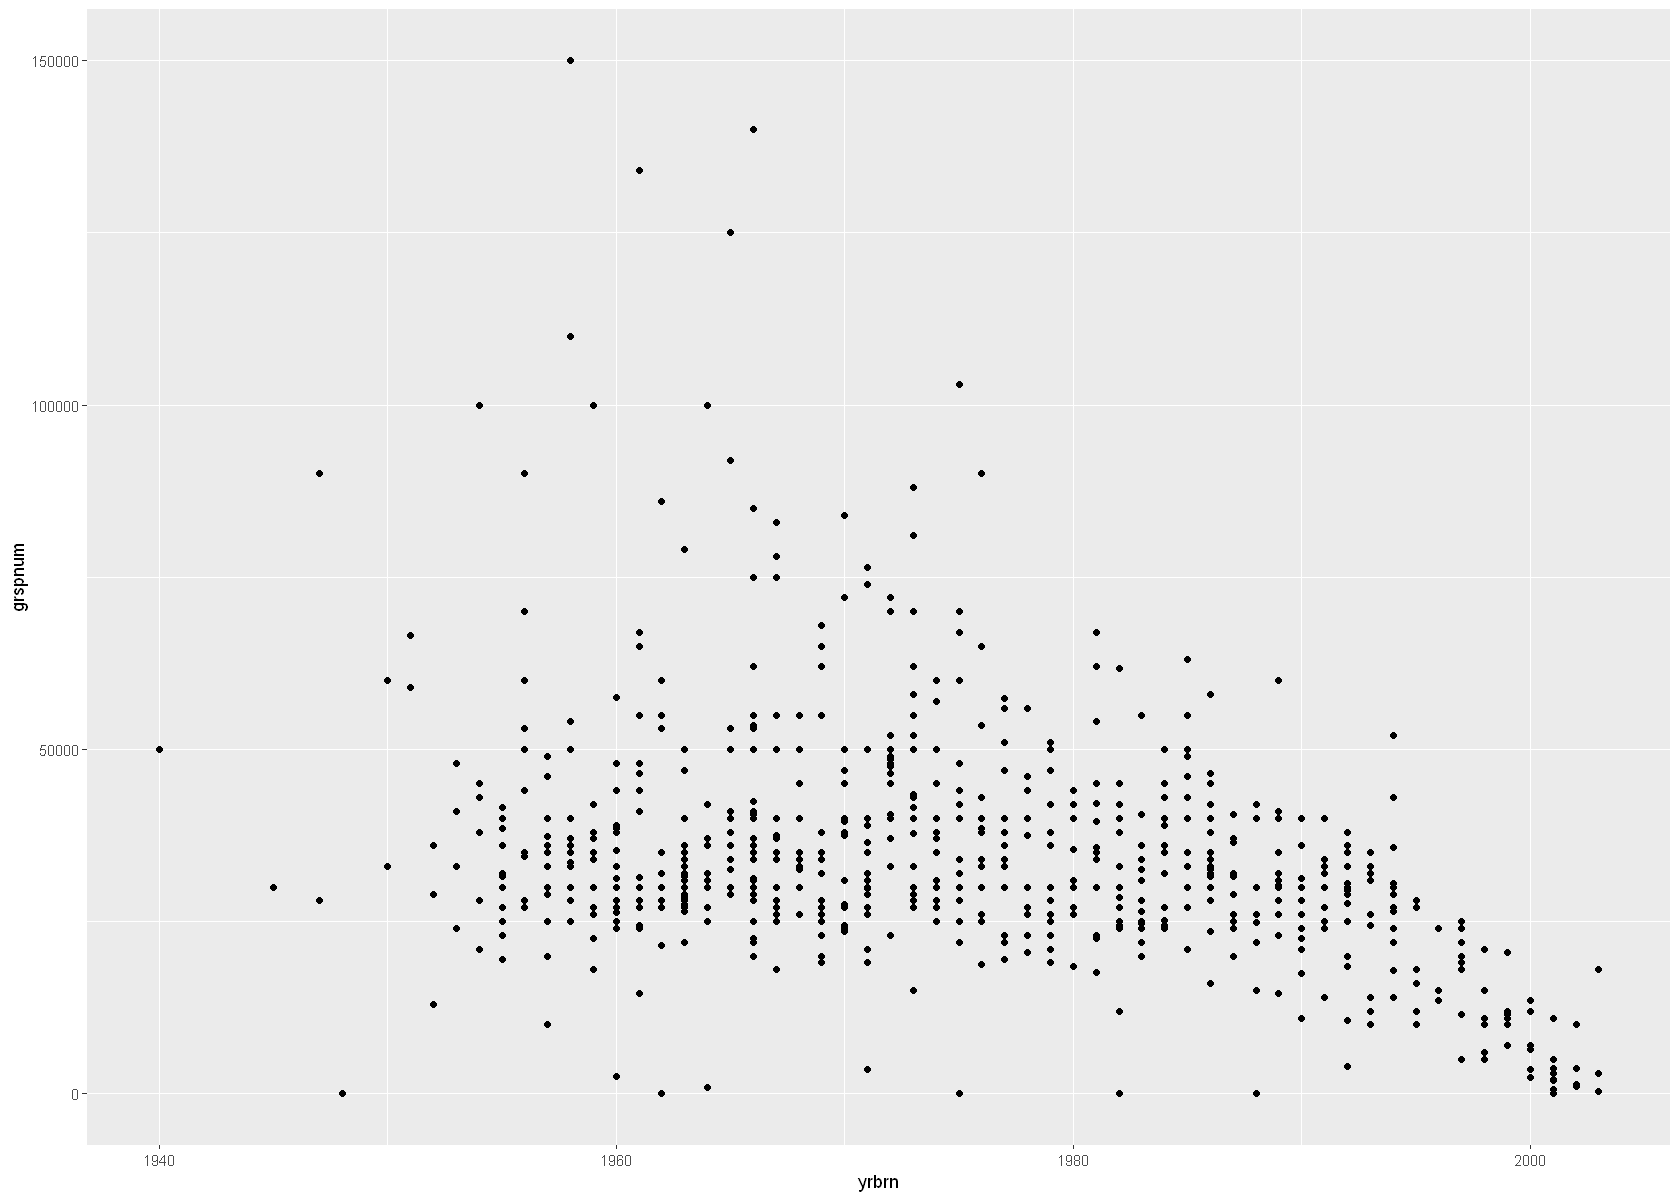

In [100]:
library(ggplot2)
options(repr.plot.width=14, repr.plot.height=10)

ess18_filt <- ess18 %>%
    filter(grspnum < 200000)

ggplot(data = ess18_filt, aes(x = yrbrn, y = grspnum)) + 
    geom_point()

## Structure of a ggplot

As a rule, a ggplot follows this template:

```
ggplot(data = <DATA>, mapping = aes(<MAPPINGS>)) + 
  <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))
```

- **ggplot**: Main function. This functino denotes what should be included in the plot. The function `ggplot` does not in itself contain information about the type of plot. This is specified via a geom funkcion.
    - *data*: The primary argument for ggplot is the data to be plotted. A data frame is expected


- **mapping**: Argument. Here the information is the data is "mapped" (aes: "aesthetics") to the plot. The primary mappings are `x` and `y`. Other mappings include `colour`, `fill`, `shape`, `size`. Mappings are always specified as `aes(MAPPINGS)` (fx `aes(x = 'eduyrs', y = 'grspnum')`). Mappings can both be specified as an argument for the main ggplot function or for the specific geom functinon. The difference is in whether the mapping applies to the whole plot or a specific geom layer.


- **GEOM_FUNCTION (fx geom_point)**: The plotting function. A "geom" is the geometric shape use to represent the data points (bars, lines, boxplots, points etc.). It is possible to have several geom function (several layers) in the same plot.
    - *mapping*: All geom functions in ggplot accept a mapping argument. However, not all aesthetics are compatible with all geoms. A histogram does fx not contain a mapping for y.

### Combining information with multiple aesthetics and layers

The grammar of `ggplot2` makes it relatively easy to combine a myriad information into a single plot (below is meant more as an illustrative example): 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 34 rows containing missing values (geom_point)."


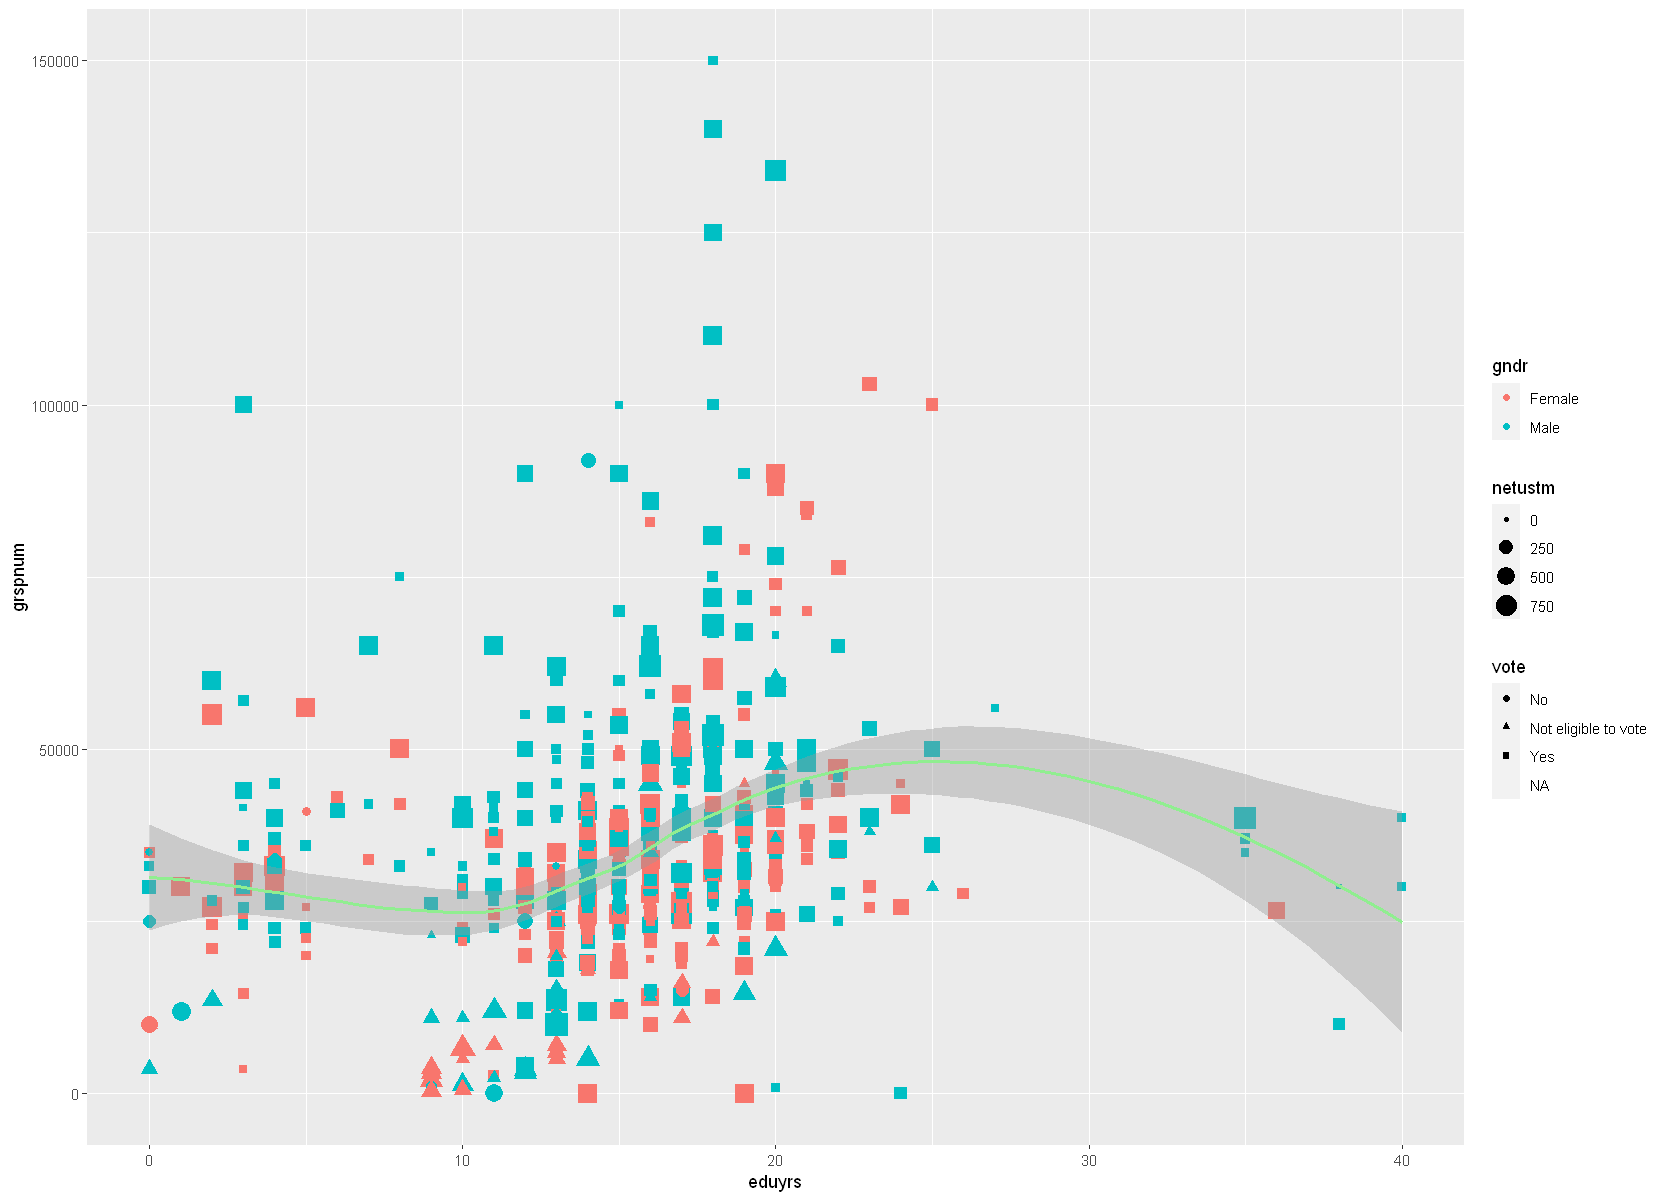

In [9]:
ggplot(data = ess18_filt, mapping = aes(x = eduyrs, y = grspnum)) +
  geom_point(mapping = aes(colour = gndr, shape = vote, size = netustm)) +
  geom_smooth(colour = 'lightgreen')

### Other plot types/geoms (histogram and boxplot)

Because the input for the plot is specified before the actual plot (geom) is chosen, it is easy to switch the plot out with something else.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



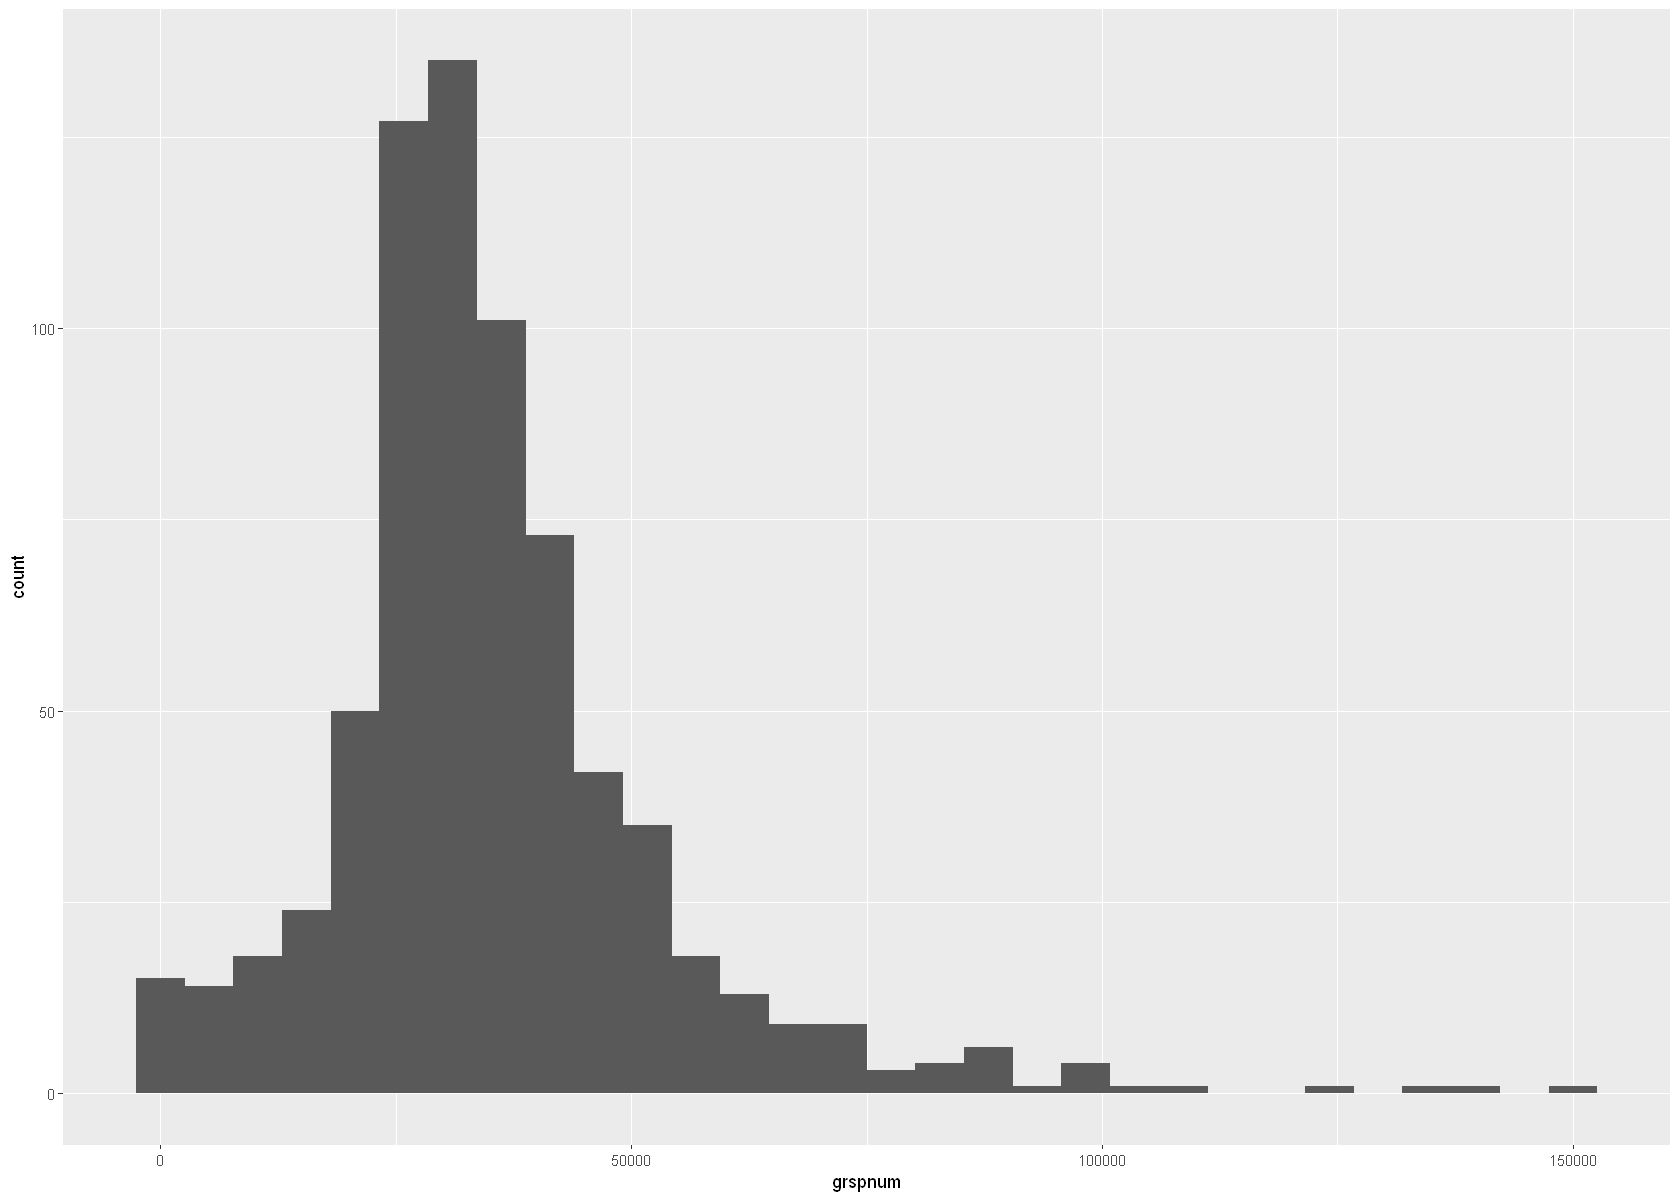

In [10]:
# histogram of monthly income

ggplot(data = ess18_filt, aes(x = grspnum)) + 
    geom_histogram()

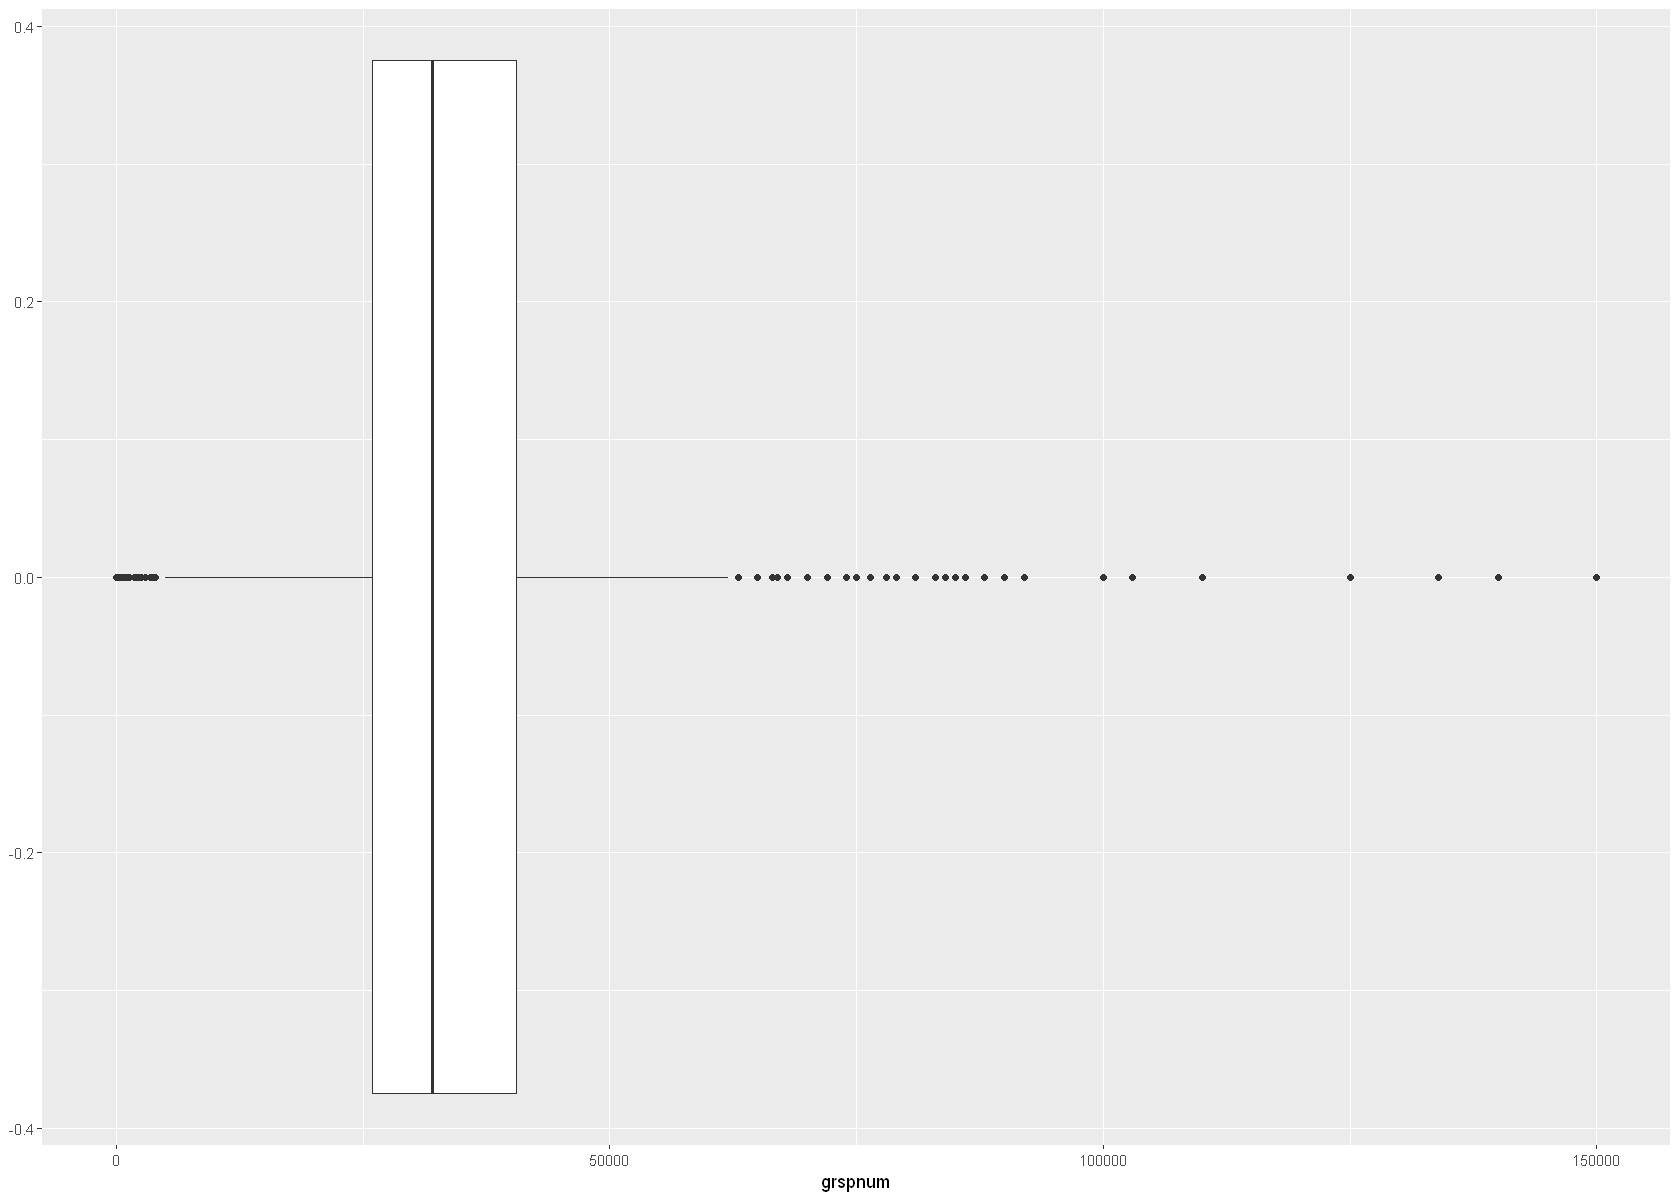

In [11]:
# boxplot of monthly income - only geom is changed

ggplot(data = ess18_filt, aes(x = grspnum)) + 
    geom_boxplot()

### Inspecting a linear correlation

Combining a scatterplot with a smoothed conditional means plot allows for a quick visualization of a possible linear correlation.

The `geom_smooth` geom accepts the argument `method = "lm"`. This fits a linear regression line on the data:

`geom_smooth()` using formula 'y ~ x'



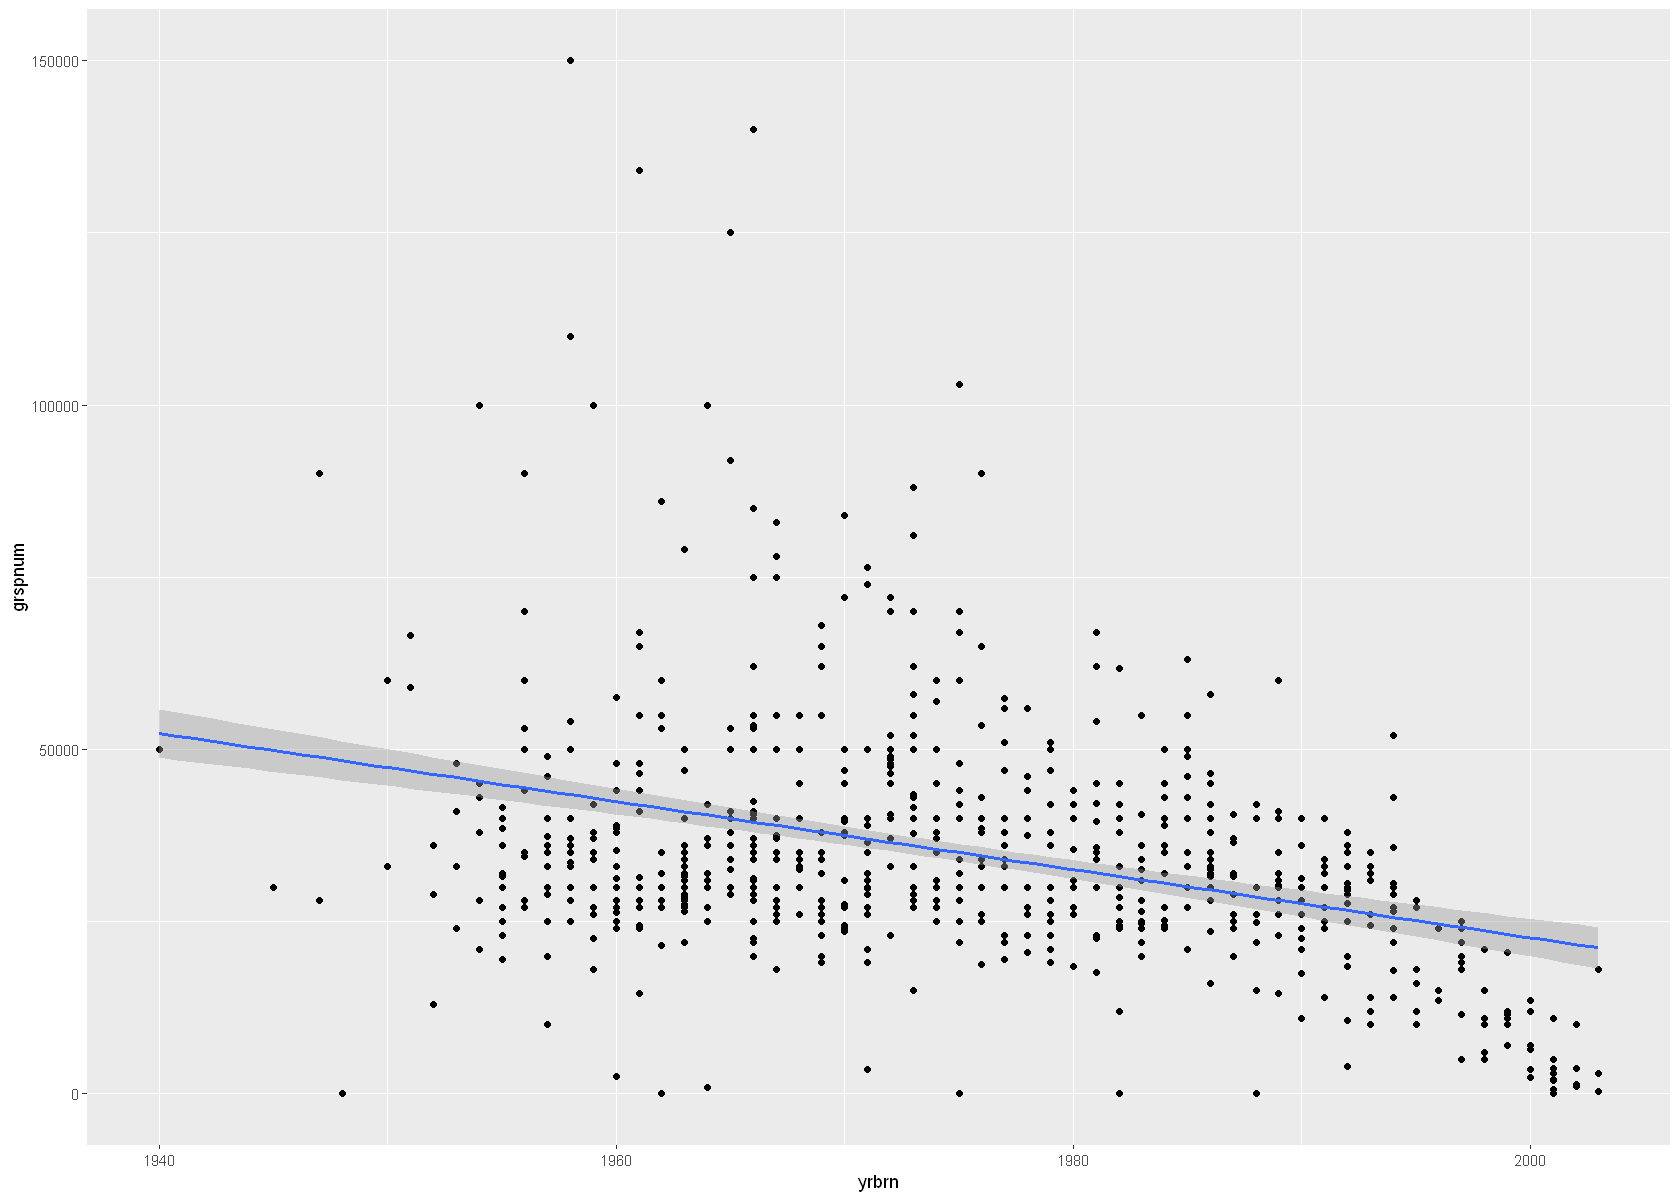

In [12]:
ggplot(data = ess18_filt, aes(x = yrbrn, y = grspnum)) + 
    geom_point() + 
    geom_smooth(method = "lm")

By default the line is fitted with a 95% confidence interval for the line coloured in. This can be disabled with the `se` argument. The confidence level can be changed with the `level` argument.

## Customizing the plot

A ggplot can be customized in a wide variety of ways. Here the most simple changes and additions are covered.

### Labels

Labels can be added for each aesthetic used in the graph with the function `labs`:

Warning message:
"Removed 33 rows containing missing values (geom_point)."


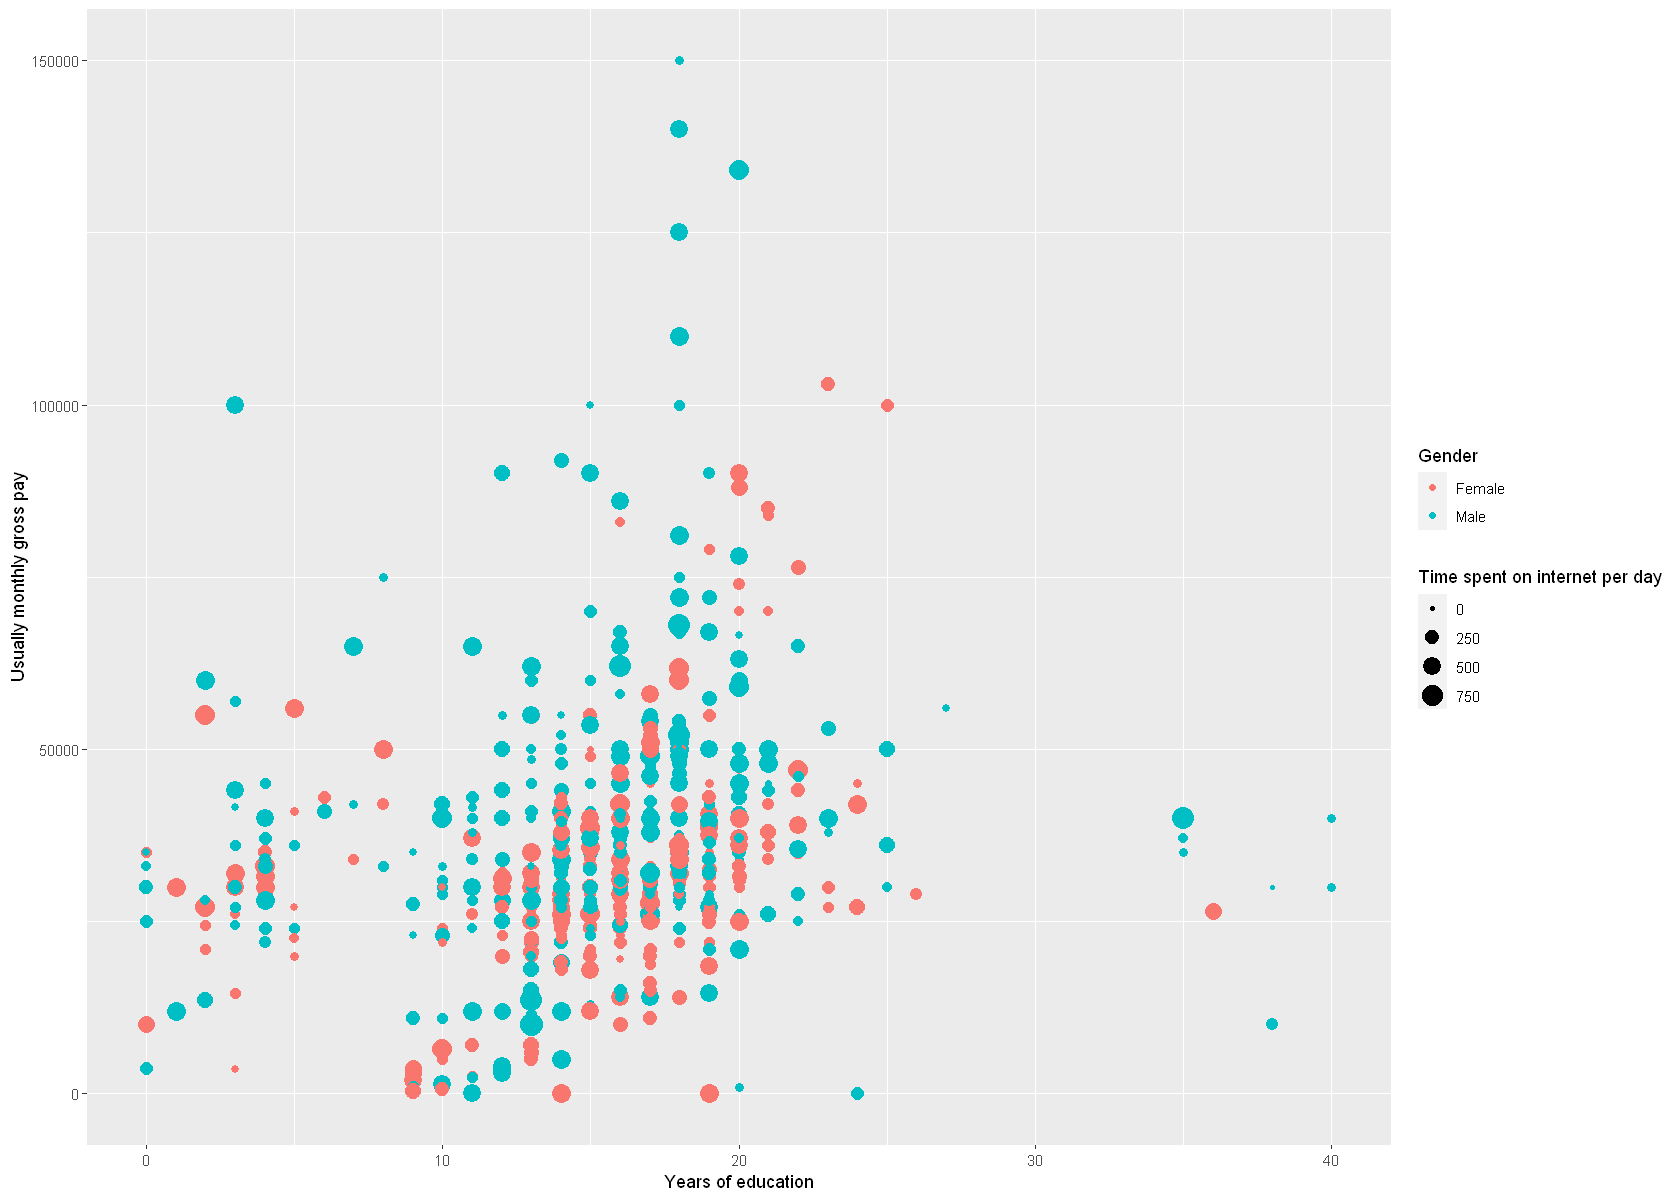

In [25]:
ggplot(data = ess18_filt, mapping = aes(x = eduyrs, y = grspnum, colour = gndr, size = netustm)) +
    geom_point() + 
    labs(x = 'Years of education', y = 'Usually monthly gross pay', colour = 'Gender', size = 'Time spent on internet per day')

## Title

A title can be added using either `ggtitle()` or with `labs()`.

Warning message:
"Removed 33 rows containing missing values (geom_point)."


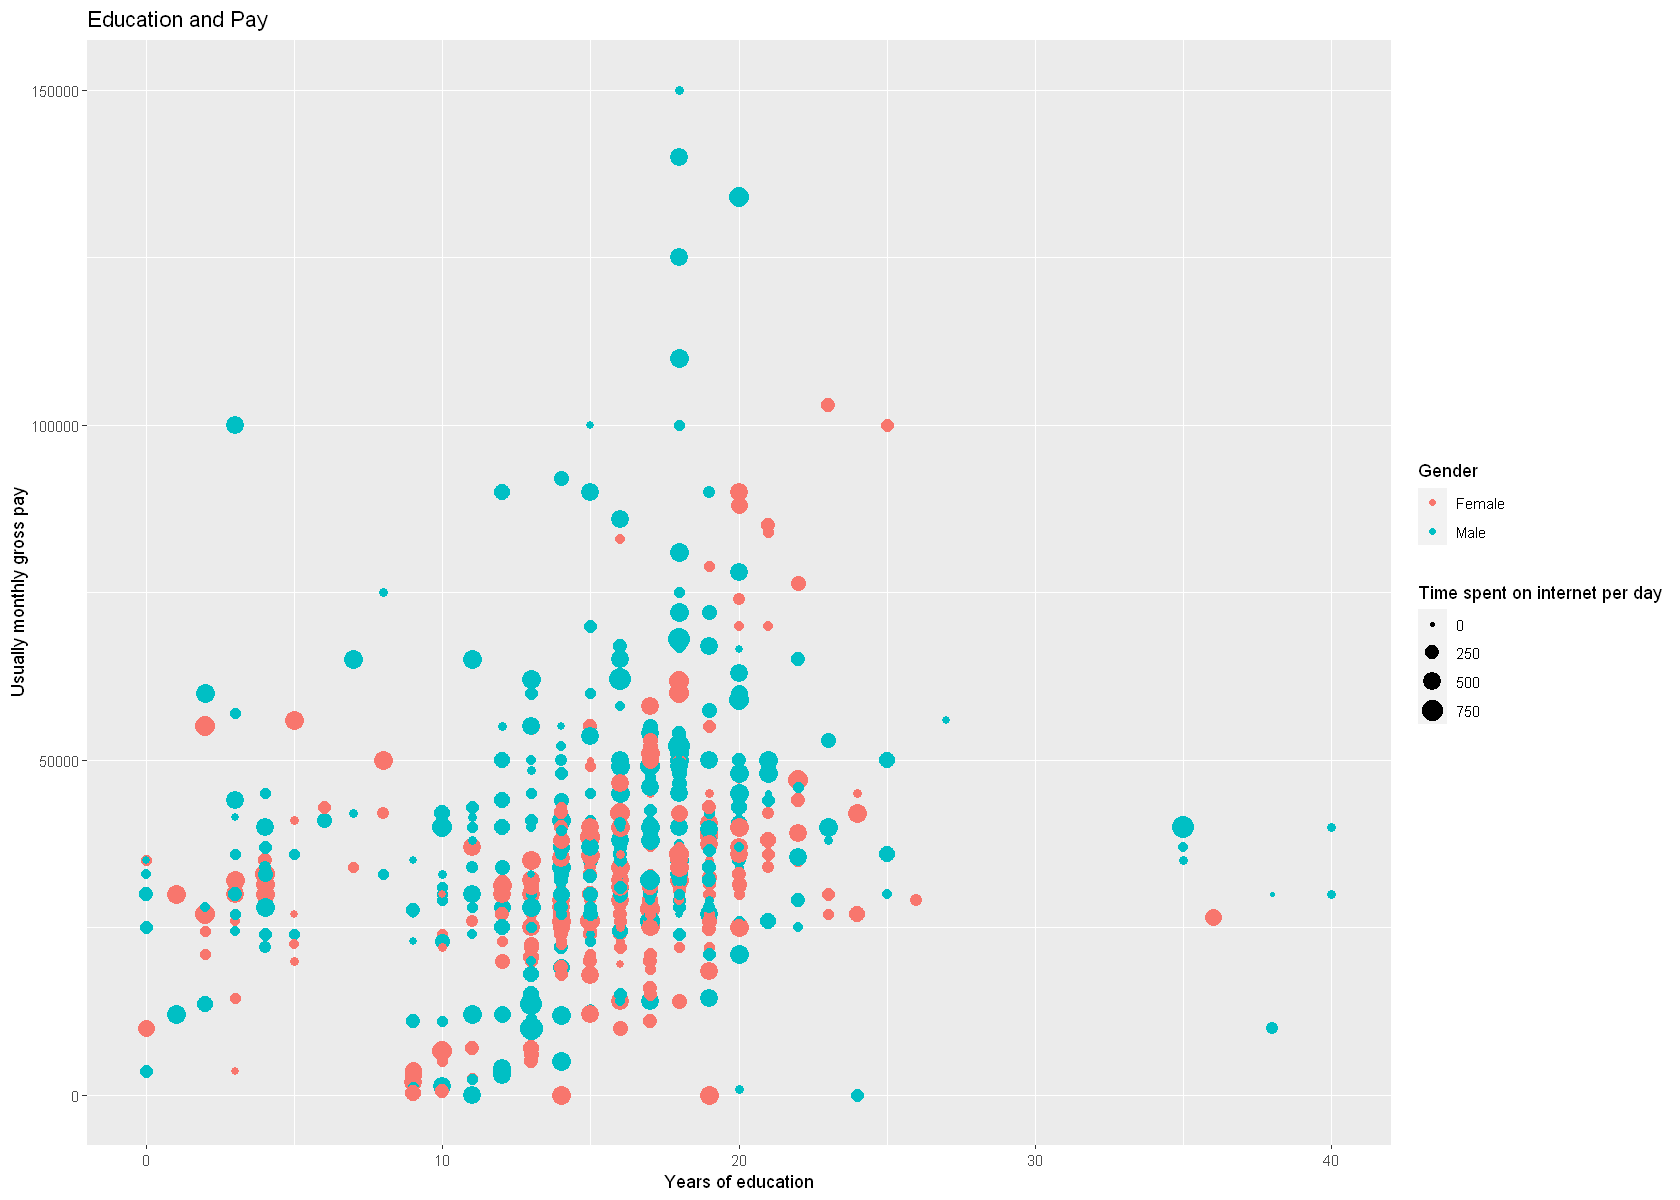

In [26]:
ggplot(data = ess18_filt, mapping = aes(x = eduyrs, y = grspnum, colour = gndr, size = netustm)) +
    geom_point() + 
    labs(x = 'Years of education', y = 'Usually monthly gross pay', colour = 'Gender', size = 'Time spent on internet per day') + 
     ggtitle('Education and Pay')

Warning message:
"Removed 33 rows containing missing values (geom_point)."


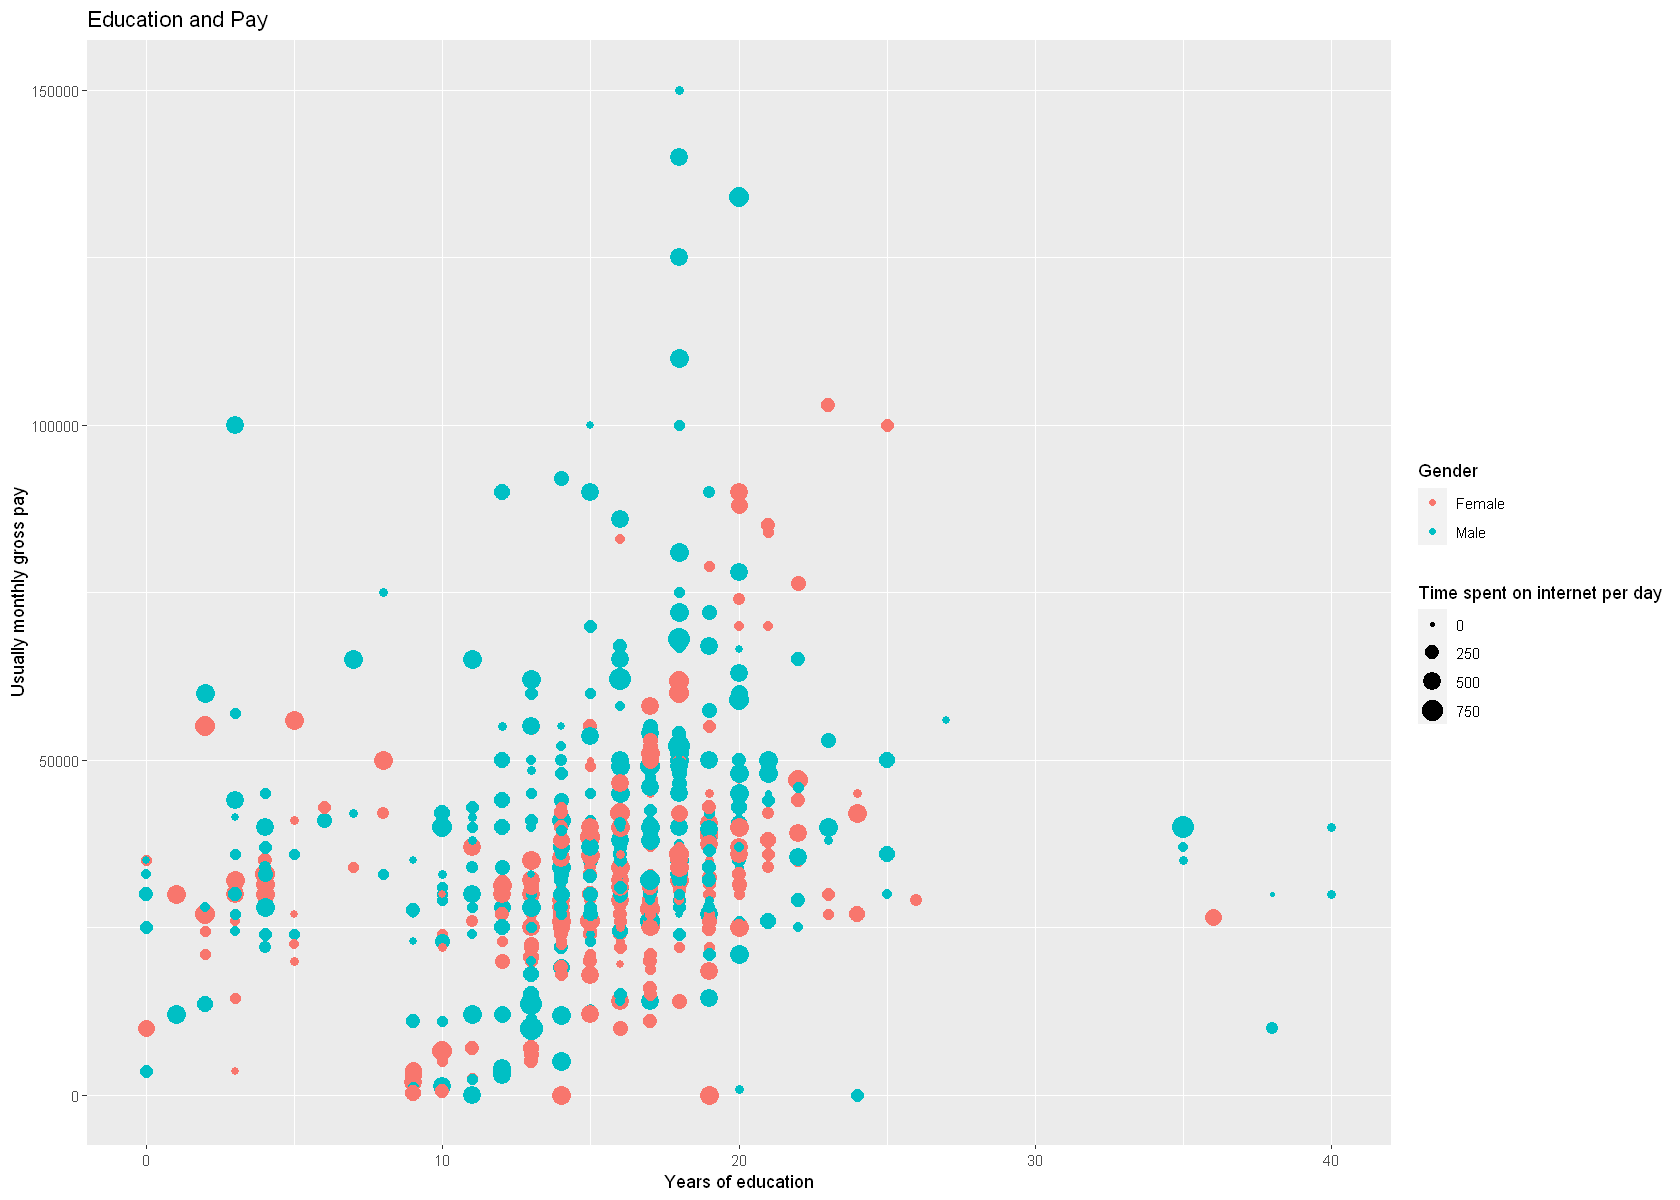

In [27]:
ggplot(data = ess18_filt, mapping = aes(x = eduyrs, y = grspnum, colour = gndr, size = netustm)) +
    geom_point() + 
    labs(title = 'Education and Pay', x = 'Years of education', y = 'Usually monthly gross pay', colour = 'Gender', size = 'Time spent on internet per day')

## Legend

The legend uses values from the data. If one wants to change the legend for the plot, it can be done with the appropriate scale function:

Warning message:
"Removed 33 rows containing missing values (geom_point)."


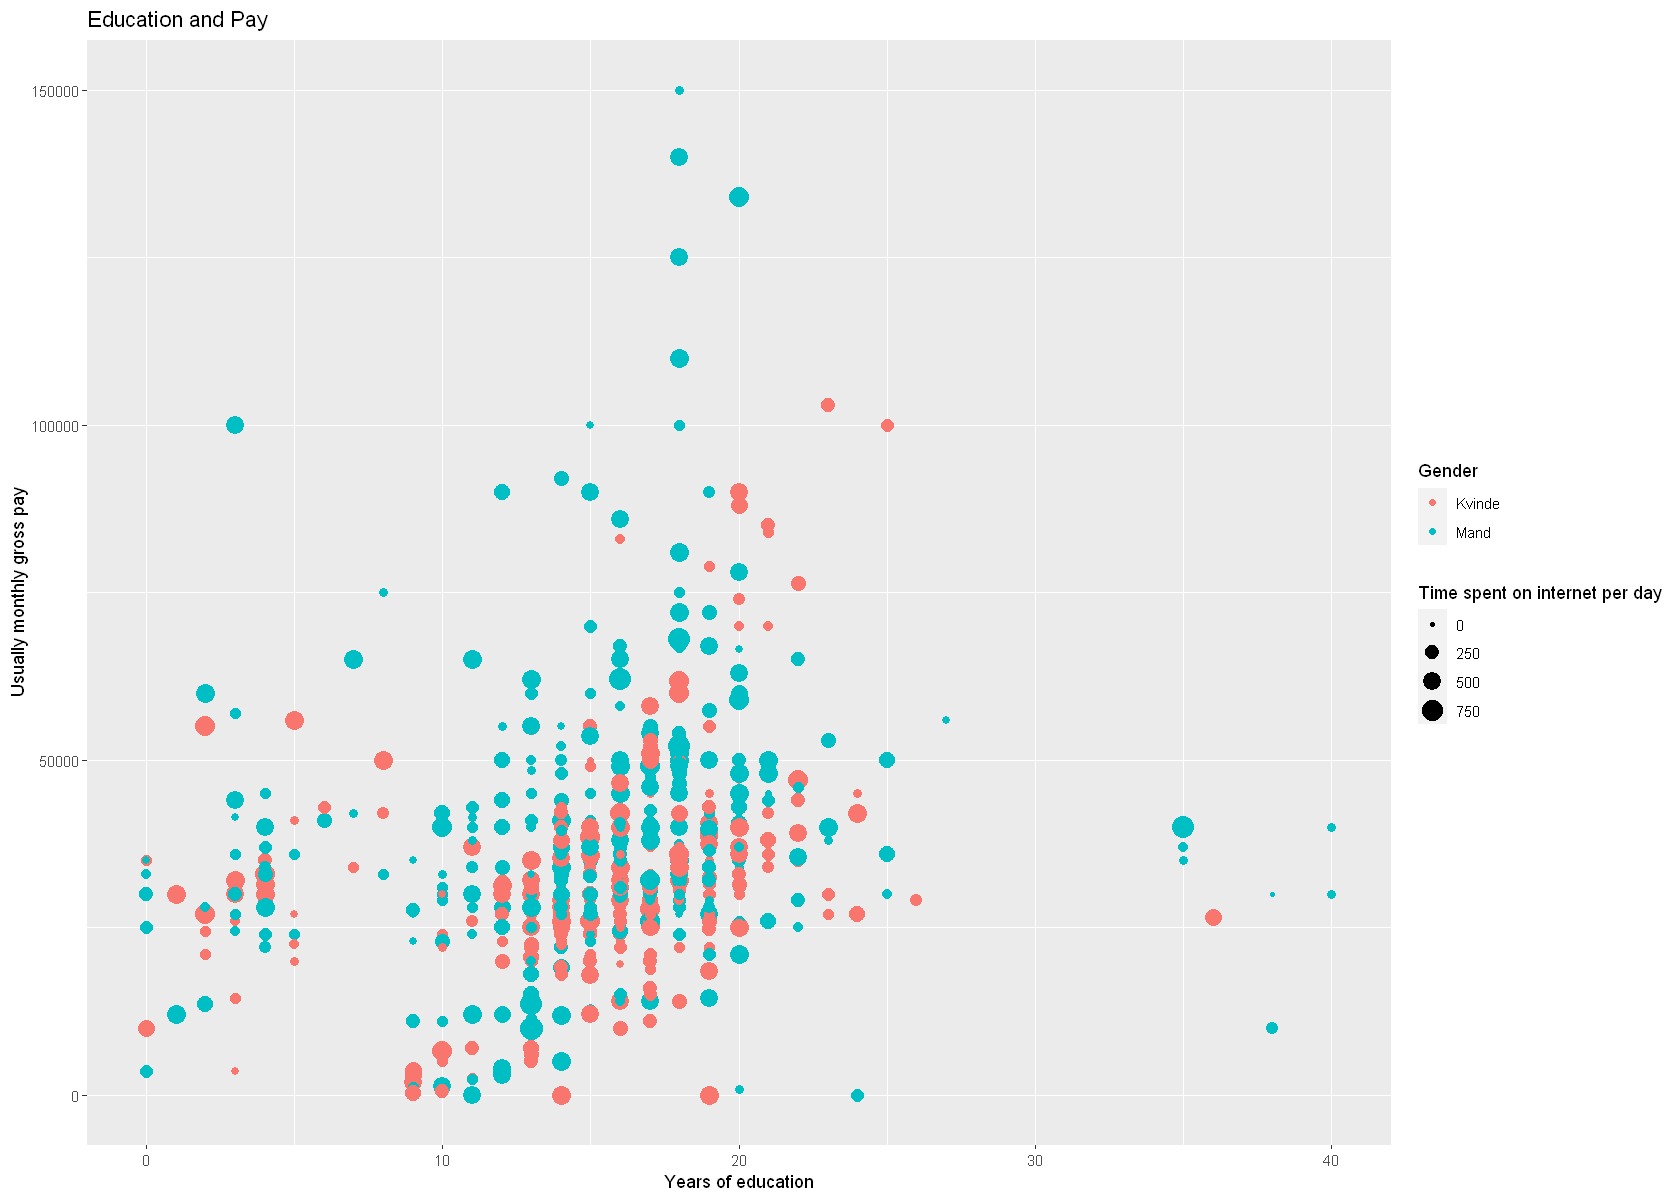

In [29]:
ggplot(data = ess18_filt, mapping = aes(x = eduyrs, y = grspnum, colour = gndr, size = netustm)) +
    geom_point() + 
    labs(title = 'Education and Pay', x = 'Years of education', y = 'Usually monthly gross pay', colour = 'Gender', size = 'Time spent on internet per day') + 
    scale_colour_discrete(labels = c('Kvinde', 'Mand'))

## Themes

ggplot contains a wide variety of standard themes (https://ggplot2.tidyverse.org/reference/index.html#section-themes). It is also possible to setup one's own theme. Below the `theme_minimal` is used:

Warning message:
"Removed 33 rows containing missing values (geom_point)."


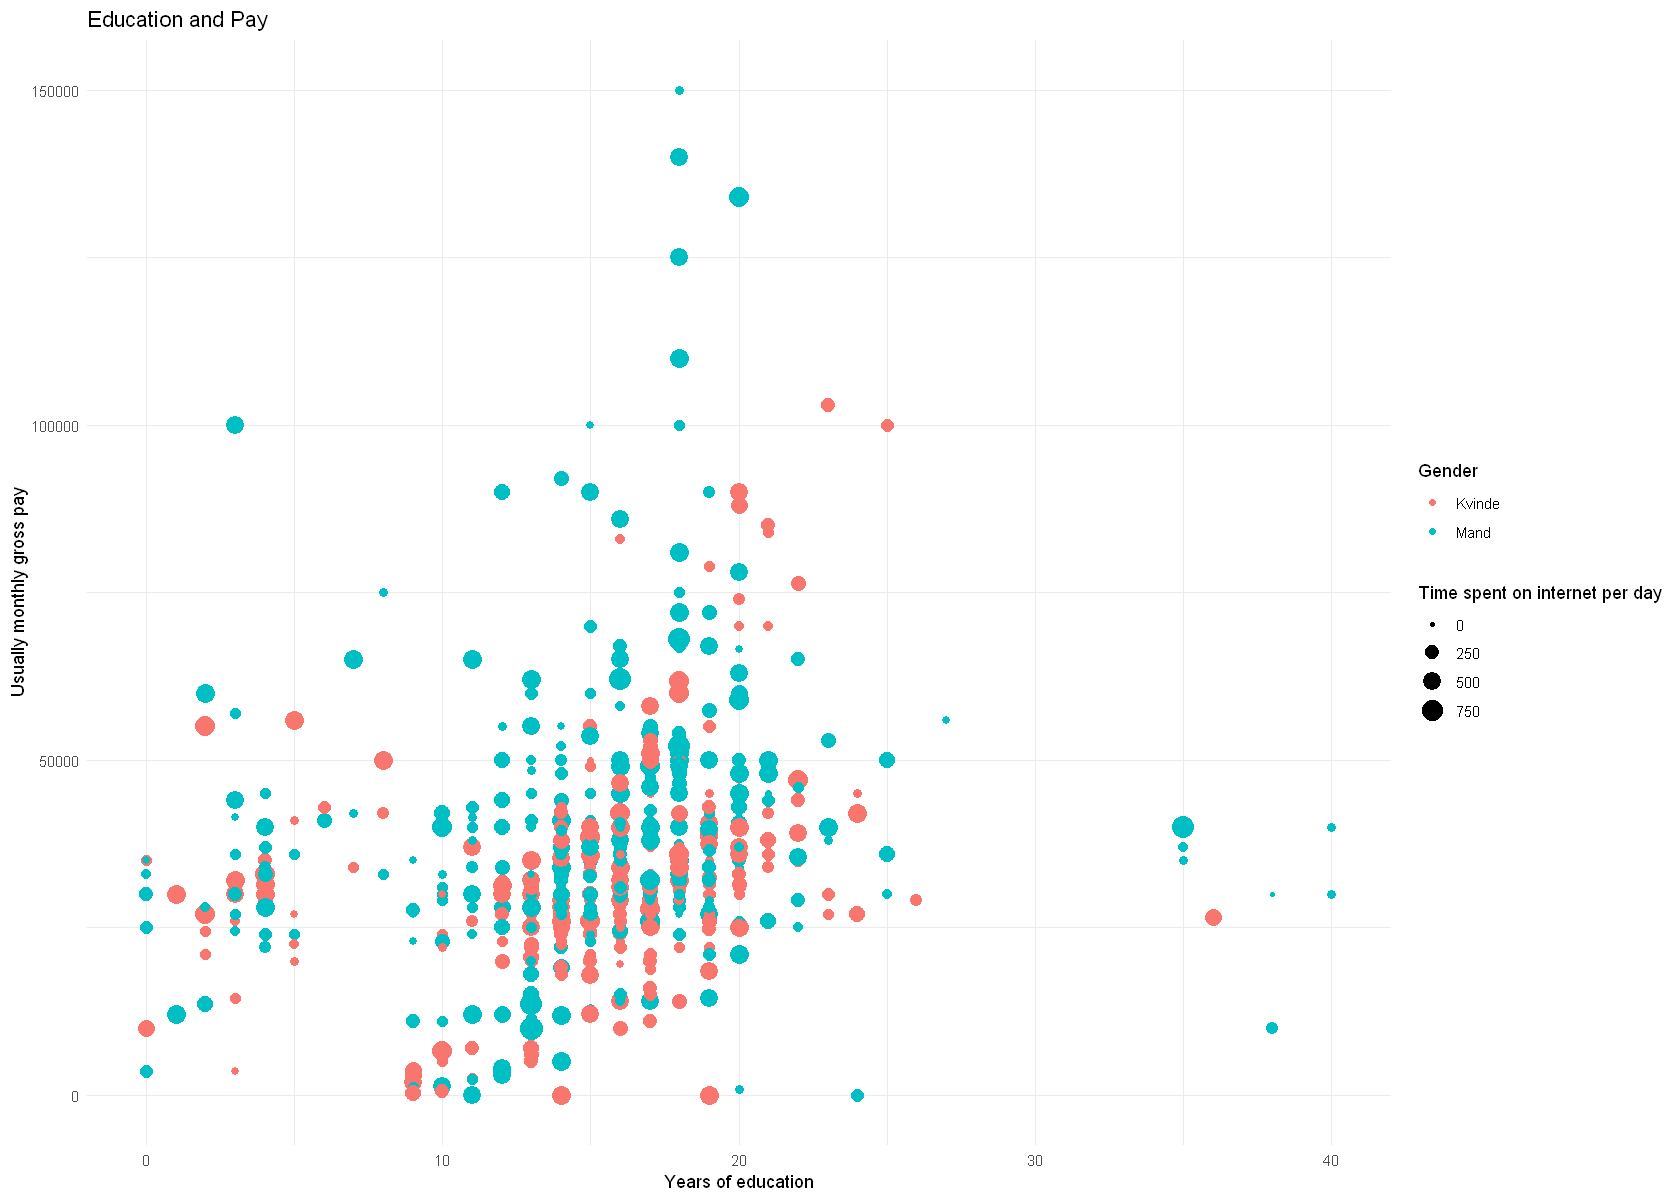

In [31]:
ggplot(data = ess18_filt, mapping = aes(x = eduyrs, y = grspnum, colour = gndr, size = netustm)) +
    geom_point() + 
    labs(title = 'Education and Pay', x = 'Years of education', y = 'Usually monthly gross pay', colour = 'Gender', size = 'Time spent on internet per day') + 
    scale_colour_discrete(labels = c('Kvinde', 'Mand')) + 
    theme_minimal()